In [40]:
from sklearn.datasets import  load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 
import matplotlib.pyplot as plt

%matplotlib inline


In this notebook, First I have done some exploration on the data using matplotlib.Then, I use different classifier models to predict the breast cancer.

1. KNN Classifier

2. LogisticRegression.

3.RandomForestClassifier

In [41]:
cancer = load_breast_cancer()
#print(cancer.DESCR)

In [42]:
print(cancer.feature_names)
print(cancer.target_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [43]:
cancer.data.shape


(569, 30)

# Process Outline

1.Get the data(Pre process)

2.Pick an Algorithm

3..Train the Algorithm.Verify the Algorithm

4.Predict

In [44]:
import pandas as pd
data=pd.read_csv("BreastCancer.csv")
data.tail(10)


,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se
560,559,925277,B,14.59,22.68,96.39,657.1,0.08473,0.133,0.1029,0.03736,0.1454,0.06147,0.2254,1.108,2.224,19.54,0.004242,0.04639,0.06578
561,560,925291,B,11.51,23.93,74.52,403.5,0.09261,0.1021,0.1112,0.04105,0.1388,0.0657,0.2388,2.904,1.936,16.97,0.0082,0.02982,0.05738
562,561,925292,B,14.05,27.15,91.38,600.4,0.09929,0.1126,0.04462,0.04304,0.1537,0.06171,0.3645,1.492,2.888,29.84,0.007256,0.02678,0.02071
563,562,925311,B,11.2,29.37,70.67,386,0.07449,0.03558,0,0.00000,0.106,0.05502,0.3141,3.896,2.041,22.81,0.007594,0.008878,0
564,563,925622,M,15.22,30.62,103.40,716.9,0.1048,0.2087,0.255,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.04844,0.07359
565,564,926125,M,20.92,25.09,143.00,1347,0.1099,0.2236,0.3174,0.14740,0.2149,0.06879,0.9622,1.026,8.758,118.8,0.006399,0.0431,0.07845
566,565,926424,M,21.56,22.39,142.00,1479,0.111,0.1159,0.2439,0.13890,0.1726,0.05623,1.176,1.256,7.673,158.7,0.0103,0.02891,0.05198
567,566,926682,M,20.13,28.25,131.20,1261,0.0978,0.1034,0.144,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.0395
568,567,926954,M,16.6,28.08,108.30,858.1,0.08455,0.1023,0.09251,0.05302,0.159,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.0473
569,568,927241,M,20.6,29.33,140.10,1265,0.1178,0.277,0.3514,0.15200,0.2397,0.07016,0.726,1.595,5.772,86.22,0.006522,0.06158,0.07117


C:\Users\divanand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


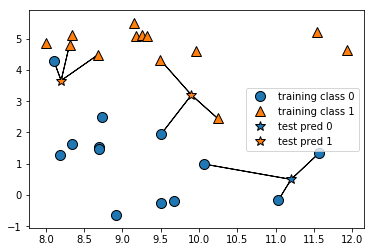

In [2]:
#KNN Classifier 
import mglearn 
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

cancer=load_breast_cancer()
#First we create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,random_state=42)
#Second we instantiate a k-NN class and fit with our training set.
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
#we evaluate the accuracy of the model by comparing the predictions 
print("Accuracy of KNN n-5, on the training set:{:.3f}".format(knn.score(X_train,y_train)))
print("Accuracy of KNN n-5, on the test set:{:.3f}".format(knn.score(X_test,y_test)))


Accuracy of KNN n-5, on the training set:0.946
Accuracy of KNN n-5, on the test set:0.930


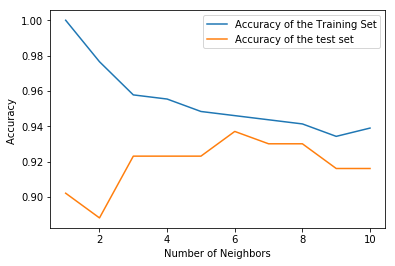

In [22]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Accuracy of the Training Set")
plt.plot(neighbors_settings,test_accuracy, label="Accuracy of the test set")
plt.ylabel("Accuracy ")
plt.xlabel("Number of Neighbors")
plt.legend()


In [4]:
#Using LogisticRegression on the cancer dataset.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

cancer= load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
print("Accuracy on the training subset:{:3f} ".format(log_reg.score(X_train,y_train)))
print("Accuracy on the test subset:{:3f}".format(log_reg.score(X_test,y_test)))


Accuracy on the training subset:0.955399 
Accuracy on the test subset:0.958042


In [55]:
log_reg100=LogisticRegression(C=100)
log_reg100.fit(X_train,y_train)
print("Accuracy on the training subset:{:3f}".format(log_reg100.score(X_train,y_train)))
print("Accuracy on the test subset:{:3f}".format(log_reg100.score(X_test,y_test)))


Accuracy on the training subset:0.971831
Accuracy on the test subset:0.965035


In [56]:
log_reg001=LogisticRegression(C=0.01)
log_reg001.fit(X_test,y_test)
print("Accuracy on the training subset:{:3f}".format(log_reg001.score(X_train,y_train)))
print("Accuracy on the test subnet:{:3f}".format(log_reg001.score(X_test,y_test)))



Accuracy on the training subset:0.936620
Accuracy on the test subnet:0.930070


# For Logistic Regression:

y=w[0]*x[0]+w[1]*x[1]+.....+w[p]*x[p]+b>0

w[0]: 0.393906  b: -0.031804


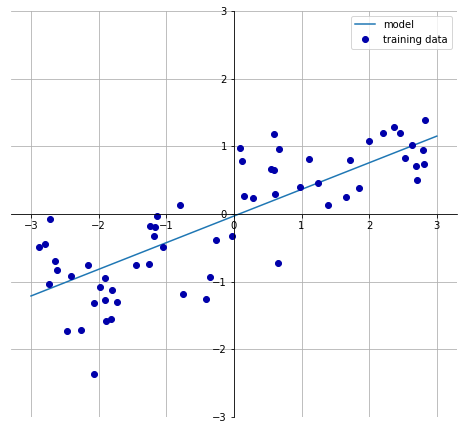

In [27]:
import mglearn 
mglearn.plots.plot_linear_regression_wave()


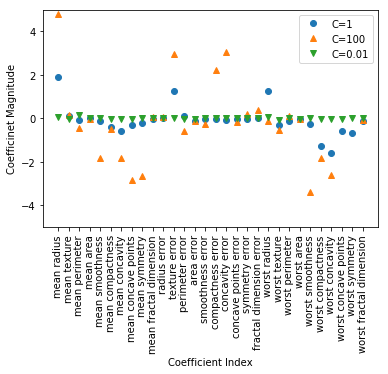

In [60]:

plt.plot(log_reg.coef_.T,"o",label="C=1")
plt.plot(log_reg100.coef_.T,"^",label="C=100")
plt.plot(log_reg001.coef_.T,"v",label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.ylim(-5,5)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficinet Magnitude")
plt.legend()


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

cancer= load_breast_cancer()

X_train, X_test,y_train,y_test=train_test_split(cancer.data,cancer.target, random_state=0)

forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("Accuracy on the training subset:{:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on the test subset:{:.3f}".format(forest.score(X_test,y_test)))


Accuracy on the training subset:1.000
Accuracy on the test subset:0.972


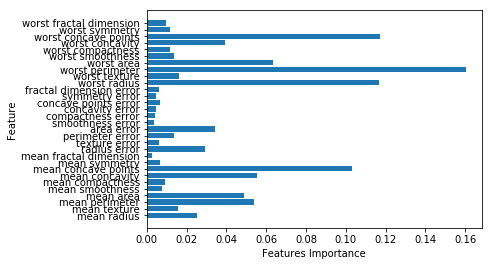

In [6]:
n_features=cancer.data.shape[1]
plt.barh(range(n_features),forest.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("Features Importance")
plt.ylabel("Feature")
plt.show()